In [8]:
# read the csv files 
import pandas as pd
import sys, os, re, glob
import numpy as np

from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import matplotlib as mpl

#import seaborn as sns

import seaborn as sns

sns.set(style="ticks")
sns.set_context("poster")


smoothing=0.0
smoothing1=0.002
smoothing2=0.001
smoothing3=0.2



ymax =35
outdir='RTD_cal'

test_cal = pd.read_csv("test_cal.csv",sep=",", index_col=None) # read info from labview csv file

temp_cal = pd.DataFrame() # create the data frame for temperatures
temp_cal=test_cal
temp_cal['t']=test_cal['t (msec)']/1000

temp_cal

,Date,Time,t (msec),RH_temp,DP_detector,Rh_volts,RTD_1,RTD_2,RTD_4,RTD_5,...,RTD_10,RTD_11,RTD_12,RTD_15,RTD_16,RTD_18,RTD_19,RTD_20,dwpt:RH_temp/Rh_volts,t
0,03//07//2019,13.03.15.013,23,24.0,0.999340,-24.999134,22.3,22.6,22.7,23.0,...,22.8,22.6,22.8,22.8,22.5,22.5,24.1,22.8,NaN,0.023
1,03//07//2019,13.03.16.791,1801,24.0,0.999346,-25.000495,22.4,22.6,22.6,23.0,...,22.8,22.6,22.8,22.8,22.5,22.5,26.0,22.8,NaN,1.801
2,03//07//2019,13.03.17.745,2755,24.0,0.999301,-24.999876,22.4,22.6,22.6,23.0,...,22.8,22.6,22.8,22.8,22.5,22.5,26.8,22.8,NaN,2.755
3,03//07//2019,13.03.18.697,3707,24.0,0.999331,-25.000000,22.4,22.6,22.6,23.0,...,22.8,22.6,22.8,22.8,22.5,22.5,27.4,22.8,NaN,3.707
4,03//07//2019,13.03.19.648,4659,24.0,0.999339,-24.999381,22.4,22.6,22.7,23.0,...,22.8,22.6,22.8,22.8,22.6,22.5,27.7,22.9,NaN,4.659
5,03//07//2019,13.03.20.602,5612,24.0,0.999302,-24.999505,22.4,22.6,22.9,23.0,...,22.8,22.6,22.7,22.8,22.6,22.5,28.2,23.0,NaN,5.612
6,03//07//2019,13.03.21.555,6565,24.0,0.999335,-25.000000,22.4,22.6,23.1,23.0,...,22.8,22.6,22.7,22.8,22.6,22.5,29.5,23.1,NaN,6.565
7,03//07//2019,13.03.22.508,7518,24.0,0.999298,-25.000371,22.4,22.6,23.4,23.0,...,22.8,22.6,22.7,22.8,22.6,22.5,30.0,23.2,NaN,7.518
8,03//07//2019,13.03.23.460,8470,24.0,0.999323,-24.999381,22.4,22.6,23.5,23.0,...,22.9,22.6,22.8,22.8,22.6,22.6,30.0,23.2,NaN,8.470
9,03//07//2019,13.03.24.412,9422,24.0,0.999308,-25.000495,22.4,22.6,23.7,22.9,...,22.9,22.6,22.8,22.8,22.6,22.6,29.8,23.3,NaN,9.422


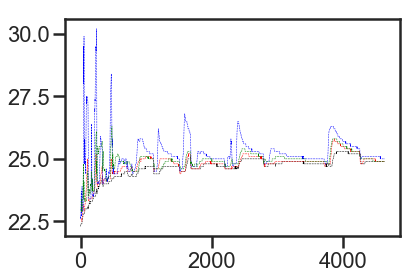

In [17]:

plt.plot(temp_cal.t, temp_cal.RTD_1, lw=0.5, label='RTD1',color='black', linestyle='dashed')
plt.plot(temp_cal.t, temp_cal.RTD_2, lw=0.5, label='RTD2',color='red', linestyle='dashed')
plt.plot(temp_cal.t, temp_cal.RTD_4, lw=0.5, label='RTD4',color='blue', linestyle='dashed')
plt.plot(temp_cal.t, temp_cal.RTD_5, lw=0.5, label='RTD5',color='green', linestyle='dashed')


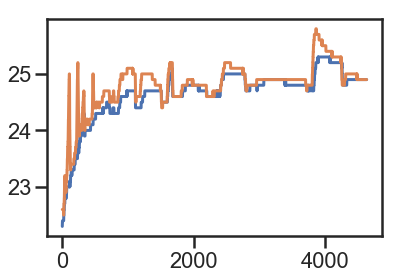

In [18]:
plt.plot(temp_cal.t, temp_cal.RTD_1,temp_cal.t, temp_cal.RTD_2)

In [8]:
# Save to pdf/png
outfile = os.path.join(outdir, os.path.splitext(os.path.basename(inputfile))[0])
plt.savefig("%s.pdf"%outfile, bbox_inches='tight')
plt.savefig("%s.png"%outfile, bbox_inches='tight', dpi=300)
print "...saved plots in %s.pdf/.png" % outfile


...saved plots in plots/limits_April_30_18/combineLogStats_cp.pdf/.png
